In [1]:
import yfinance as yf
import pandas as pd


In [10]:
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers import Dropout
from keras.layers import *
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date,timedelta
today = date.today()
#print("Today's date:", today)
tomorrow = date.today()+timedelta(days=1)
print(tomorrow)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
df = web.DataReader('^NSEI',data_source='yahoo',start='2018-01-01',end=today)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,10495.200195,10404.650391,10477.549805,10442.200195,153400.0,10442.200195
2018-01-03,10503.599609,10429.549805,10482.650391,10443.200195,167300.0,10443.200195
2018-01-04,10513.000000,10441.450195,10469.400391,10504.799805,174900.0,10504.799805
2018-01-05,10566.099609,10520.099609,10534.250000,10558.849609,180900.0,10558.849609
2018-01-08,10631.200195,10588.549805,10591.700195,10623.599609,169000.0,10623.599609
...,...,...,...,...,...,...
2022-03-25,17294.900391,17076.550781,17289.000000,17153.000000,237100.0,17153.000000
2022-03-28,17235.099609,17003.900391,17181.849609,17222.000000,253200.0,17222.000000
2022-03-29,17343.650391,17235.699219,17297.199219,17325.300781,235100.0,17325.300781


In [ ]:
df.shape

(1045, 6)

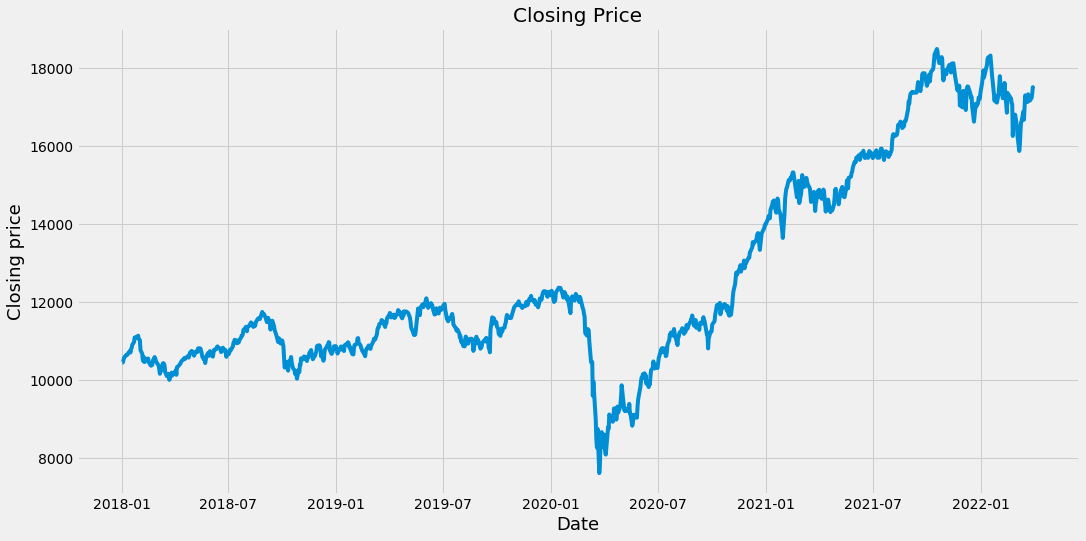

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price',fontsize=18)
plt.show()


In [ ]:
data=df.filter(['Close'])
#convert dataframe into numpy array
dataset=data.values
#getting number of rows for training
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len



836

In [ ]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
#transform data into (0,1)
scaled_data = scaler.fit_transform(dataset) #computes the minimum and maximum values and scales all the values accordingly
scaled_data

array([[0.2606057 ],
       [0.26069772],
       [0.26636633],
       ...,
       [0.89401204],
       [0.90992742],
       [0.90684464]])

In [ ]:
#create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]
#split the datainto x_train and y_train
x_train=[]
y_train=[]

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i,0])  #not including i and it will contain first 60 values(0 to 59)
    y_train.append(train_data[i,0])    #this will contain the 61st value(60th position) that we want out model to predict
    if i <=61:
        print(x_train)
        print(y_train)
        print()

[array([0.2606057 , 0.26069772, 0.26636633, 0.27134017, 0.27729869,
       0.27853184, 0.27809014, 0.27983859, 0.28260387, 0.28815287,
       0.28437074, 0.29247797, 0.29509605, 0.30224629, 0.30882596,
       0.31963871, 0.31985035, 0.3183458 , 0.32393622, 0.31650533,
       0.3144854 , 0.31349157, 0.2899059 , 0.28125111, 0.26576359,
       0.2637805 , 0.27299659, 0.261779  , 0.26958256, 0.26600749,
       0.2701117 , 0.2615351 , 0.25473462, 0.2530782 , 0.25648765,
       0.2551303 , 0.265101  , 0.27352573, 0.27092148, 0.26526663,
       0.26209182, 0.25293549, 0.24284976, 0.23410296, 0.24224245,
       0.2407884 , 0.25869163, 0.25919308, 0.25772538, 0.25305519,
       0.23787133, 0.22858614, 0.231356  , 0.23419956, 0.23047262,
       0.21973347, 0.23193582, 0.23685908, 0.23037601, 0.23940347])]
[0.24245866405741978]

[array([0.2606057 , 0.26069772, 0.26636633, 0.27134017, 0.27729869,
       0.27853184, 0.27809014, 0.27983859, 0.28260387, 0.28815287,
       0.28437074, 0.29247797, 0.29

In [ ]:
#convert x_train y_train to numpy array so we can use them to train Lstm model
x_train,y_train = np.array(x_train), np.array(y_train)

In [ ]:
#reshape the xtrain data --> lstm network expects input to be 3d 
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))    #(1168,60,1)
x_train.shape

(776, 60, 1)

In [ ]:
#create LSTM model
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.1))

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.1))

#model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#COMPILE MODEL
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=32,epochs=1) #epoch is number of iteration 

25/25 [==============================] - 2s 72ms/step - loss: 0.0016


In [ ]:
#create the testing dataset
#creating new array containing scaled values from index 1168 to 1228
test_data = scaled_data[training_data_len-60:, :]
#create datasets x_test y test
x_test=[]
y_test=dataset[training_data_len:, :]   #this will consist the values that we want our model to predict
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])    #x_test contains the past 60 values

In [ ]:
#convert data to numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the model predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)    #unscaling the values back from 0 and 1 to original value

In [ ]:
#get the RMS error --> shows accuracy (lower the value better the model)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

16.372621673145932

C:\Users\Rakshit Shah\AppData\Local\Temp\ipykernel_23812\1691182904.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


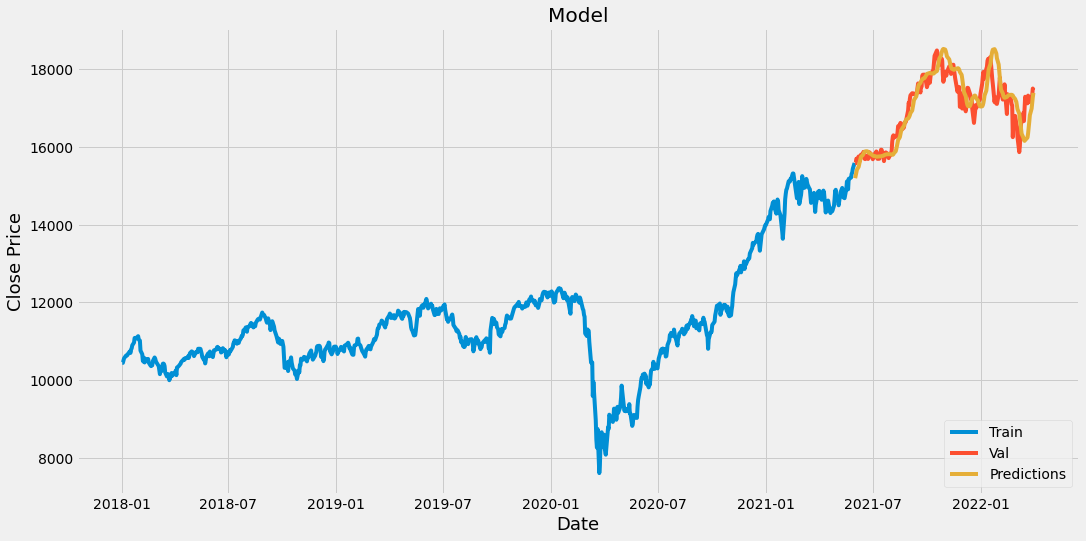

In [ ]:
#plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.savefig('static/assets/images/predict.png')
plt.show()

In [ ]:
#show the valid and predicted price
valid

,Close,Predictions
Date,,
2021-06-01,15574.849609,15192.639648
2021-06-02,15576.200195,15262.522461
2021-06-03,15690.349609,15335.867188
2021-06-04,15670.250000,15411.348633
2021-06-07,15751.650391,15486.653320
...,...,...
2022-03-25,17153.000000,16813.708984
2022-03-28,17222.000000,16981.578125
2022-03-29,17325.300781,17135.968750


In [ ]:
#get the quote
nifty_quote = web.DataReader('^NSEI',data_source='yahoo',start='2016-01-01',end=today)
#create a new dataframe
new_df = nifty_quote.filter(['Close'])
#get the last 60 day closing price values and convert the dataframe to an array 
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#APPEND THE LAST 60 DAYS
X_test.append(last_60_days_scaled)
#convert the X_test data set to np array
X_test = np.array(X_test)
#Reshape
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get predicted scaled price
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
nifty_quote

[[17483.828]]


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,7937.549805,7781.100098,7924.549805,7791.299805,134700.0,7791.299805
2016-01-05,7831.200195,7763.250000,7828.399902,7784.649902,145200.0,7784.649902
2016-01-06,7800.950195,7721.200195,7788.049805,7741.000000,147100.0,7741.000000
2016-01-07,7674.950195,7556.600098,7673.350098,7568.299805,188900.0,7568.299805
2016-01-08,7634.100098,7581.049805,7611.649902,7601.350098,157400.0,7601.350098
...,...,...,...,...,...,...
2022-03-25,17294.900391,17076.550781,17289.000000,17153.000000,237100.0,17153.000000
2022-03-28,17235.099609,17003.900391,17181.849609,17222.000000,253200.0,17222.000000
2022-03-29,17343.650391,17235.699219,17297.199219,17325.300781,235100.0,17325.300781


<function output at 0x000001C54251ECA0>
